<a href="https://colab.research.google.com/github/PabloC1700/C-digos-TFM---Py-Colab-/blob/main/TP3/%C3%8Dndice_de_Similitud_Fbref_Top5L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
excel_file_path = '/content/Copia de Jugadores_Top5L24 - FBREF.xlsx'  # Update the path to your Excel file
xls = pd.ExcelFile(excel_file_path)

# Load all sheets into a dictionary of DataFrames
sheets = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}

# Print the sheet names to verify they are loaded correctly
print("Loaded sheets:", xls.sheet_names)


Loaded sheets: ['Estadisticas Generales', 'Porteros', 'Porteros Avanzada', 'Estadisticas de Tiros', 'Estadisticas de Pases', 'Estadisticas de Tipos de Pases', 'Estadisticas Generacion de Tiro', 'Estadisticas Defensivas', 'Estadisticas de Posesion', 'Estadisticas de Tiempo de Juego', 'Estadisticas Diversas']


In [ ]:
def select_and_combine_columns(sheet_column_mapping):
    combined_df = pd.DataFrame()

    for sheet_name, columns in sheet_column_mapping.items():
        if sheet_name in sheets:
            df = sheets[sheet_name][columns]
            combined_df = pd.concat([combined_df, df], axis=1)
        else:
            print(f"Sheet {sheet_name} not found.")

    return combined_df

# Define the mapping of sheets to columns you want to combine
sheet_column_mapping = {
    'Estadisticas Generales': ['Jugador','Pos','Equipo','Edad','MinJug/90s','Pases progresivos'],
    'Estadisticas de Pases': ['%Pases completados','Pases cortos completados','%Pases medios completados','%Pases largos completados'],
    'Estadisticas de Tipo de Pases': ['Pases largos a espalda de la defensa'],
    'Estadisticas Generacion de Tiro': ['ACGDef'],
    'Estadisticas Defensivas': ['Entradas','Entradas exitosas','Entradas en 1er tercio','Entradas en 2ndo tercio','%Situaciones 1vs1 exitosas','Bloqueos','Pases bloqueados','Tiros bloqueados','Intercepciones','Despejes'],
    'Estadisticas de Posesion': ['Toques en area propia','Toques en 1er tercio','Toques en 2ndo tercio','Distancia de conduccion progresiva'],
    'Estadisticas de Tiempo de Juego': ['xG+/-90'],
    'Estadisticas Diversas': ['Recuperaciones','%Duelos aereos ganados']
}

# Call the function to combine data from the specified sheets and columns
combined_df = select_and_combine_columns(sheet_column_mapping)

# Display the combined DataFrame
print(combined_df.head())


Sheet Estadisticas de Tipo de Pases not found.
             Jugador Pos          Equipo  Edad  MinJug/90s  Pases progresivos  \
0         Max Aarons  DF     Bournemouth  24.0        13.7               43.0   
1   Brenden Aaronson  MF    Union Berlin  23.0        14.1               56.0   
2    Paxten Aaronson  MF  Eint Frankfurt  20.0         1.1                5.0   
3  Keyliane Abdallah  FW       Marseille  18.0         0.0                0.0   
4   Yunis Abdelhamid  DF           Reims  36.0        30.9              137.0   

   %Pases completados  Pases cortos completados  %Pases medios completados  \
0                85.7                     766.0                       92.7   
1                79.3                     266.0                       99.5   
2                72.6                     279.0                       97.9   
3                62.6                     144.0                       96.9   
4                92.4                    1202.0                       94.5  

In [ ]:
# Filter the DataFrame
mediocampistas = combined_df[(combined_df['Pos'].str.contains('DF')) & (combined_df['MinJug/90s'] > 14) & (combined_df['Edad'] >= 24) & (combined_df['Edad'] <= 30)].reset_index(drop=True)

In [ ]:
mediocampistas

,Jugador,Pos,Equipo,Edad,MinJug/90s,Pases progresivos,%Pases completados,Pases cortos completados,%Pases medios completados,%Pases largos completados,...,Tiros bloqueados,Intercepciones,Despejes,Toques en area propia,Toques en 1er tercio,Toques en 2ndo tercio,Distancia de conduccion progresiva,xG+/-90,Recuperaciones,%Duelos aereos ganados
0,Abdel Abqar,DF,Alavés,25.0,25.2,48.0,78.2,272.0,99.1,47.7,...,26.0,23.0,114.0,187.0,559.0,411.0,1400.0,-0.05,108.0,52.7
1,Tosin Adarabioyo,DF,Fulham,26.0,18.0,62.0,80.6,410.0,93.0,52.8,...,11.0,25.0,80.0,181.0,713.0,631.0,2661.0,-0.51,43.0,66.7
2,Emmanuel Agbadou,DF,Reims,26.0,28.8,179.0,81.6,748.0,88.0,63.7,...,25.0,55.0,116.0,237.0,820.0,1233.0,5460.0,0.12,217.0,58.4
3,Felix Agu,DF,Werder Bremen,24.0,17.9,32.0,81.2,730.0,81.8,65.3,...,7.0,13.0,41.0,61.0,302.0,363.0,1223.0,0.40,71.0,38.5
4,Nayef Aguerd,DF,West Ham,28.0,20.6,68.0,81.0,467.0,81.5,56.9,...,24.0,17.0,85.0,187.0,709.0,618.0,2388.0,0.00,102.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Gabriele Zappa,DF,Cagliari,24.0,27.5,97.0,100.0,1.0,0.0,0.0,...,5.0,19.0,72.0,70.0,539.0,710.0,1971.0,-0.41,107.0,36.0
283,Cedric Zesiger,DF,Wolfsburg,25.0,18.2,81.0,0.0,0.0,0.0,0.0,...,21.0,15.0,88.0,141.0,629.0,634.0,2046.0,0.79,66.0,70.9
284,Oleksandr Zinchenko,DF,Arsenal,27.0,19.1,229.0,100.0,0.0,100.0,0.0,...,3.0,20.0,26.0,46.0,335.0,885.0,2334.0,-0.92,104.0,62.8
285,Kurt Zouma,DF,West Ham,29.0,31.5,53.0,66.7,2.0,100.0,33.3,...,28.0,29.0,160.0,275.0,798.0,626.0,2019.0,0.12,95.0,57.4


In [ ]:
mediocampistas = mediocampistas.drop(['Equipo','Pos'],axis=1)

In [ ]:
mediocampistas

,Jugador,Edad,MinJug/90s,Pases progresivos,%Pases completados,Pases cortos completados,%Pases medios completados,%Pases largos completados,ACGDef,Entradas,...,Tiros bloqueados,Intercepciones,Despejes,Toques en area propia,Toques en 1er tercio,Toques en 2ndo tercio,Distancia de conduccion progresiva,xG+/-90,Recuperaciones,%Duelos aereos ganados
0,Abdel Abqar,25.0,25.2,48.0,78.2,272.0,99.1,47.7,0.0,33.0,...,26.0,23.0,114.0,187.0,559.0,411.0,1400.0,-0.05,108.0,52.7
1,Tosin Adarabioyo,26.0,18.0,62.0,80.6,410.0,93.0,52.8,0.0,21.0,...,11.0,25.0,80.0,181.0,713.0,631.0,2661.0,-0.51,43.0,66.7
2,Emmanuel Agbadou,26.0,28.8,179.0,81.6,748.0,88.0,63.7,0.0,65.0,...,25.0,55.0,116.0,237.0,820.0,1233.0,5460.0,0.12,217.0,58.4
3,Felix Agu,24.0,17.9,32.0,81.2,730.0,81.8,65.3,0.0,45.0,...,7.0,13.0,41.0,61.0,302.0,363.0,1223.0,0.40,71.0,38.5
4,Nayef Aguerd,28.0,20.6,68.0,81.0,467.0,81.5,56.9,0.0,26.0,...,24.0,17.0,85.0,187.0,709.0,618.0,2388.0,0.00,102.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Gabriele Zappa,24.0,27.5,97.0,100.0,1.0,0.0,0.0,0.0,51.0,...,5.0,19.0,72.0,70.0,539.0,710.0,1971.0,-0.41,107.0,36.0
283,Cedric Zesiger,25.0,18.2,81.0,0.0,0.0,0.0,0.0,0.0,19.0,...,21.0,15.0,88.0,141.0,629.0,634.0,2046.0,0.79,66.0,70.9
284,Oleksandr Zinchenko,27.0,19.1,229.0,100.0,0.0,100.0,0.0,0.0,50.0,...,3.0,20.0,26.0,46.0,335.0,885.0,2334.0,-0.92,104.0,62.8
285,Kurt Zouma,29.0,31.5,53.0,66.7,2.0,100.0,33.3,0.0,23.0,...,28.0,29.0,160.0,275.0,798.0,626.0,2019.0,0.12,95.0,57.4


In [ ]:
import math
import numpy as np
from scipy import stats

# Define the columns you need for the KPIs
lista_valores_ofensivos = [
    'Jugador','Edad','MinJug/90s','Pases progresivos','%Pases completados','Pases cortos completados','%Pases medios completados','%Pases largos completados','ACGDef','Entradas','Entradas exitosas','Entradas en 1er tercio','Entradas en 2ndo tercio','%Situaciones 1vs1 exitosas','Bloqueos','Pases bloqueados','Tiros bloqueados','Intercepciones','Despejes','Toques en area propia','Toques en 1er tercio','Toques en 2ndo tercio','Distancia de conduccion progresiva','xG+/-90','Recuperaciones','%Duelos aereos ganados'
]

# Create a DataFrame with the required columns and fill NaN values with 0
medios_test = mediocampistas[lista_valores_ofensivos].reset_index(drop=True).fillna(0)

# Define the parameters (excluding 'Player' and 'Squad')
params = lista_valores_ofensivos[3:]

# Get the list of unique players
jugadores = list(medios_test.Jugador.unique())

# Initialize an empty DataFrame for the results
df_ponderado = pd.DataFrame(columns=['Jugador', 'KPI'])

# Calculate the KPI for each player
for jugador in jugadores:
    player = medios_test.loc[medios_test['Jugador'] == jugador].reset_index()
    player_values = player.loc[0, params].values

    values = [math.floor(stats.percentileofscore(medios_test[param], player_value)) for param, player_value in zip(params, player_values)]
    kpi = np.mean(values)

    df_temp = pd.DataFrame({'Jugador': [jugador], 'KPI': [kpi]})
    df_ponderado = pd.concat([df_ponderado, df_temp], ignore_index=True)

# Sort the results by KPI in descending order and display the top 30
df_ponderado.sort_values(by='KPI', ascending=False).head(30)

,Jugador,KPI
2,Emmanuel Agbadou,82.826087
125,Timo Hübers,82.086957
245,Nico Schlotterbeck,80.565217
42,Gleison Bremer,80.043478
52,Sergi Cardona,79.869565
14,Joachim Andersen,79.695652
238,Cristian Romero,79.086957
140,Max Kilman,79.043478
32,Bernardo,77.043478
188,Facundo Medina,76.652174


In [ ]:
pip install lxml matplotlib plottable

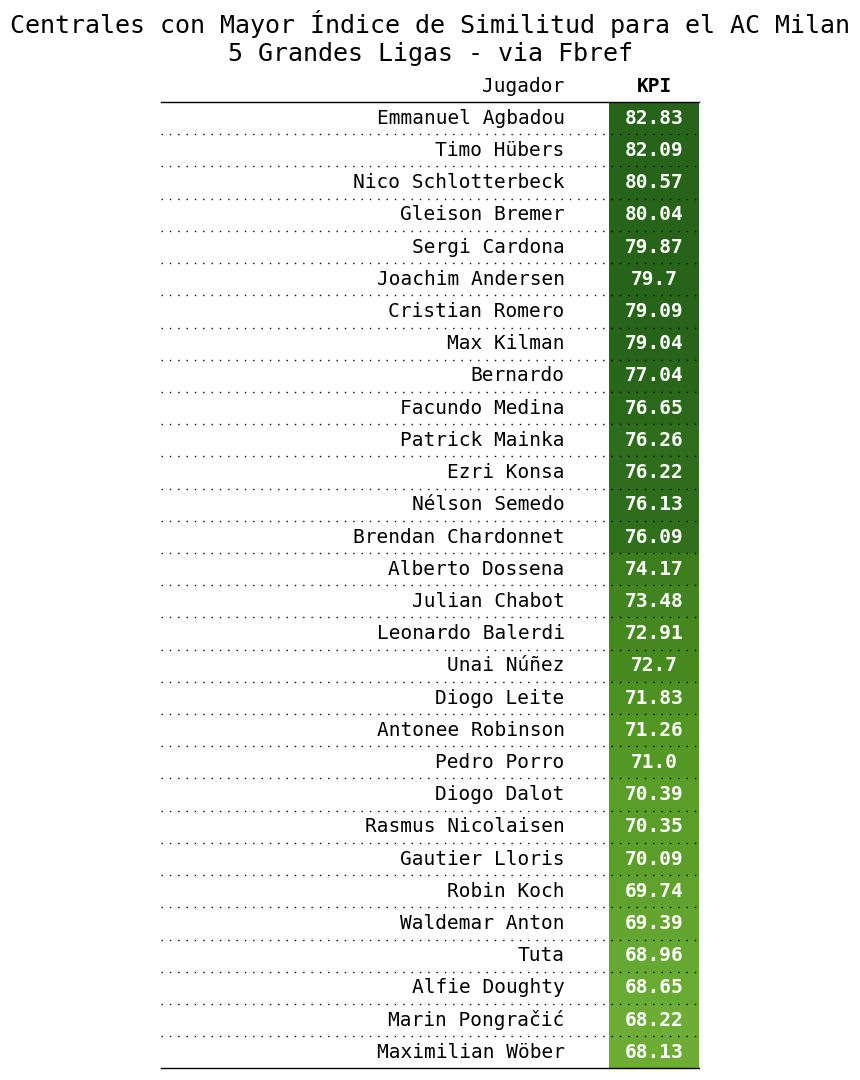

In [ ]:
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap

# Define the background and text colors
bg_color = "#FFFFFF"
text_color = "#000000"

# Define the row colors
row_colors = {
    "top4": "#E1FABC",
    "top6": "#FFFC97",
    "relegation": "#E79A9A",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"
import matplotlib

# Sort and prepare the top 15 players for plotting
df_plot = df_ponderado.sort_values(by='KPI', ascending=False).head(30)
df_plot['KPI'] = round(df_plot['KPI'], 2)

# Define column definitions for the plot
col_defs = [
    ColumnDefinition(
        name="Jugador",
        textprops={"ha": "right"},
        width=5
    ),
    ColumnDefinition(
        name="KPI",
        textprops={"ha": "center", "color": "#000000", "weight": "bold"},
        cmap=normed_cmap(df_ponderado["KPI"], cmap=matplotlib.cm.PiYG, num_stds=2)
    )
]

# Create the plot
fig, ax = plt.subplots(figsize=(7, 13))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    df_plot,
    column_definitions=col_defs,
    index_col="Jugador",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 3, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["Jugador", "KPI"])

plt.title('Centrales con Mayor Índice de Similitud para el AC Milan\n5 Grandes Ligas - via Fbref', size=18)
plt.savefig('thumbnail.png', dpi=300, transparent=True)